<a href="https://colab.research.google.com/github/tuteng614/CSC311/blob/main/csc311_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Discrete Distribution: Coin Flipping

Consider a fair coin, which when flipped, is equally likely to come up Heads as it is Tails. In other words, the probability of both outcomes is 0.5. We can simulate one such flip as follows.

In [2]:
def flip_a_coin(p=0.5, print_stuff=False):
  draw_uniform = np.random.uniform(0, 1)
  if draw_uniform < p:
    if print_stuff:
      print("Heads!")
    return 1
  else:
    if print_stuff:
      print("Tails!")
    return 0

num_heads = flip_a_coin(print_stuff=True)

Tails!


We can repeat this experiment many times and keep track of the number of heads we get.

In [ ]:
def flip_many_times(n=20):
  num_heads = 0
  for _ in range(n):
    num_heads += flip_a_coin()
  return num_heads / n

avg_heads = flip_many_times()
print("Empirical average for number of heads is: ", avg_heads, ".")

Empirical average for number of heads is:  0.5 .


Let's see what happens to the empirical average as we increase the number of times we flip the coin.

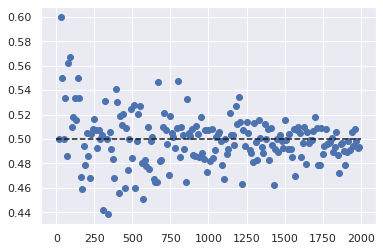

In [ ]:
plt.figure()
xs = np.arange(20, 2000, step=10)
ys = [flip_many_times(n) for n in xs]
plt.scatter(xs, ys)
plt.hlines(0.5, 0, 2000, linestyles='dashed')
plt.show()

As the number of experiments increases, the empirical average gets closer to 0.5. This is equal to the expectation of a Bernoulli distirbution, which is the distribution followed by a coin flip!

Let's also compute the empirical variance. Recall the formula: $\frac{1}{n}\sum_i (X_i - \bar{X})^2$, where $X_i$ are samples from the distribution and $\bar{X}$ is there empirical expectation (or average).

In [ ]:
def variance_flips(n):
  flip_samples = [flip_a_coin() for _ in range(n)]
  avg_heads = sum(flip_samples) / n 
  # Above, we could alternatively use np.mean(flip_samples). 
  sq_mean_dist = [(x - avg_heads)**2 for x in flip_samples]
  var = sum(sq_mean_dist) / n
  # For variance, we could also use np.var(flip_samples).
  return var

print("Variance of number of heads after 20 flips is: ", variance_flips(20), ".")

Variance of number of heads after 20 flips is:  0.22750000000000004 .


Let's repeat what we did with expectation and see how the variance changes as we vary $n$.

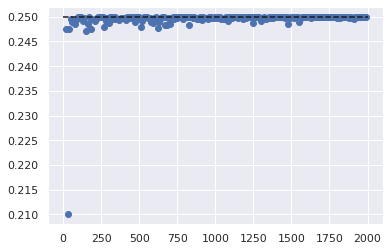

In [ ]:
plt.figure()
xs = np.arange(20, 2000, step=10)
ys = [variance_flips(n) for n in xs]
plt.scatter(xs, ys)
plt.hlines(0.25, 0, 2000, linestyles='dashed')
plt.show()

The empirical variance gets closer and closer to 0.25, which is the variance of a Bernoulli distribution with parameter 0.5! 

Recall, the variance of a Bernoulli is given by $p(1-p) = 0.5(1-0.5) - 0.25$.

# Continuous Distribution: Exponential

Let us now take a look at a continuous distribution, namely the Exponential distribution. It has a single parameter $\lambda$ and its pdf is given by $p(x) = \lambda e^{-\lambda x}$. Let's plot its pdf for $\lambda = 1$.



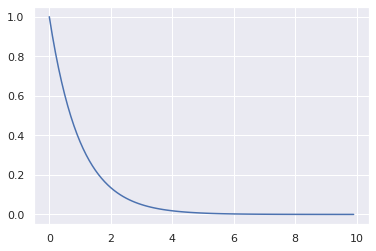

In [ ]:
plt.figure()
lamda = 1
xs = np.arange(0, 10, 0.1)
ys = [lamda * np.exp(-lamda*x) for x in xs]
plt.plot(xs, ys)
plt.show()

Its expectation is $\frac{1}{\lambda}$ and variance is $\frac{1}{\lambda^2}$. Let's simulate samples from this distribution and empirically verify these formulae.

This time we will use the function ```np.random.exponential``` which takes as its argument the value of $\frac{1}{\lambda}$. Let's fix $\lambda = 1$.

In [ ]:
def sample_exponential(lamda=1):
  return np.random.exponential(1/lamda)

def sample_n_exp(n, lamda=1):
  samples = [sample_exponential(lamda) for _ in range(n)]
  empirical_avg = np.mean(samples)
  empirical_var = np.var(samples)
  return empirical_avg, empirical_var

print("After sampling 500 times, the empirical expectation and variance are: ", sample_n_exp(500), ".")

After sampling 500 times, the empirical expectation and variance are:  (1.027412983233224, 1.0749965349583799) .


Based the given formulae, the expectation and variance are both 1! We see above that the empirical values of these quantities are close to 1.

## Side note about Documentation

If you are curious what any of the functions used do or how you can use them, we encourage you to look at their documentation by running the name of the function with a '?' before it. For instance:

`?np.mean`

In [ ]:
?np.mean